In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_008.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_023.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_010.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_084.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_016.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_080.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_064.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_055.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_031.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_047.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_085.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_025.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_062.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_057.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_076.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_018.jpg
/kaggle/input/car-brand-dataset/Car_data/Ford/Ford_048.j

In [3]:
#importing all the different libraries that we are required to be Processing Deep Learning Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import keras
from keras import models, layers
import gc
import itertools
from collections import Counter 
from sklearn.metrics import (  # Import various metrics from scikit-learn
    accuracy_score,  # For calculating accuracy
    roc_auc_score,  # For ROC AUC score
    confusion_matrix,  # For confusion matrix
    classification_report,  # For classification report
    f1_score  # For F1 score
)



2024-04-01 13:31:12.425471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 13:31:12.425578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 13:31:12.564410: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
#code for ignoring little warning during the execution
import warnings  # Import the 'warnings' module for handling warnings
warnings.filterwarnings("ignore")

In [5]:
from PIL import ImageFile

# Enable the option to load truncated images.
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

from tensorflow.keras.models import Model

#here we are using the resnet model for the classification
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras.models import Sequential

import numpy as np

from glob import glob

import matplotlib.pyplot as plt



In [7]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [8]:
dataset='/kaggle/input/car-brand-dataset/Car_data'

In [9]:
dataset

'/kaggle/input/car-brand-dataset/Car_data'

In [10]:
import os

# Specify the path
dataset_path = '/kaggle/input/car-brand-dataset/Car_data'

# List all directories (folders) in the specified path
folders = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]

# Print the total number of folders
# print("Total number of folders:", len(folders))

# Print the names of all folders
print("Names of all folders:")
for folder_name in folders:
    print(folder_name)


Names of all folders:
Ford
Hyundai
Mercedes-Benz
Volkswagen
Honda
Porsche
Kia
Toyota
Suzuki
Chevrolet
Jaguar
MG
Ferrari
BMW
Audi
Bugatti


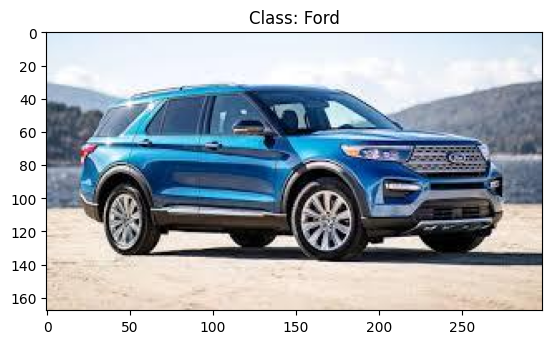

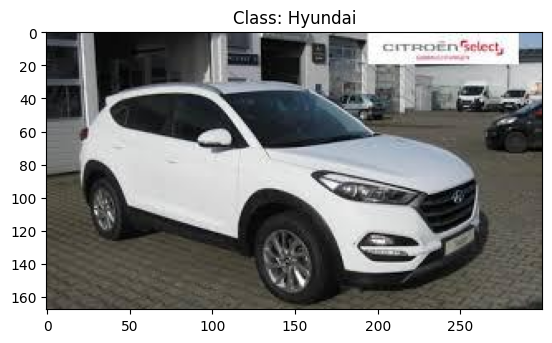

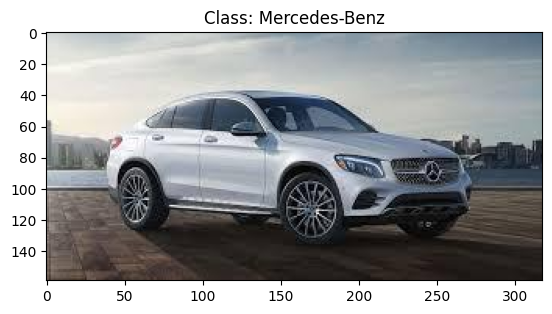

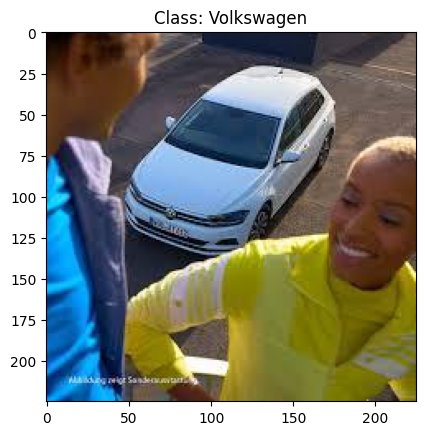

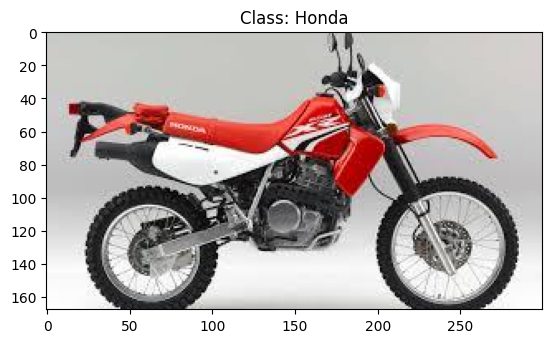

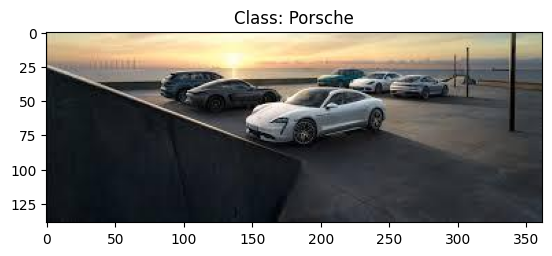

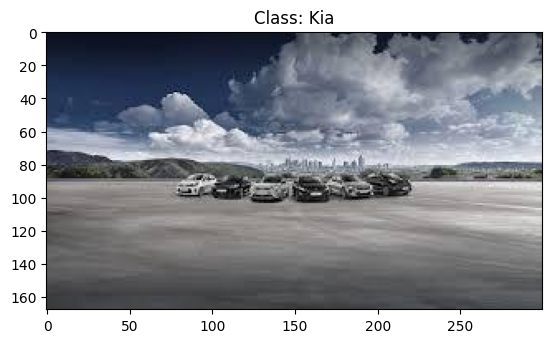

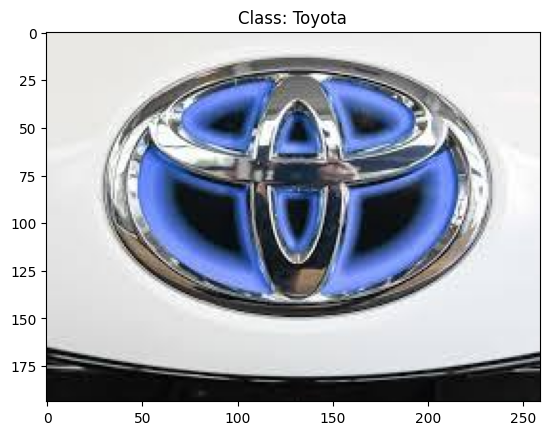

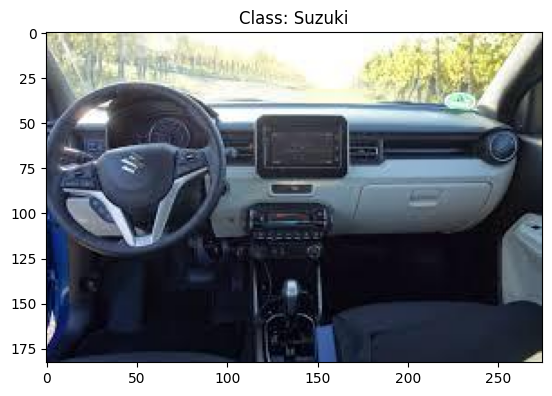

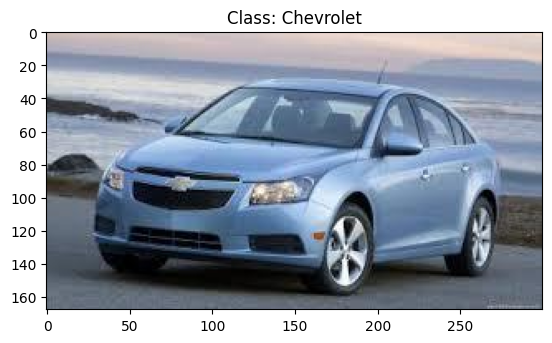

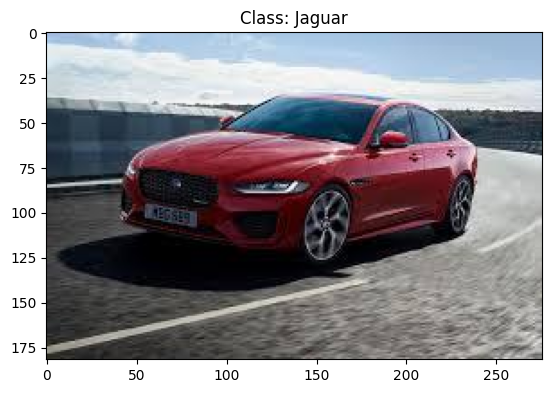

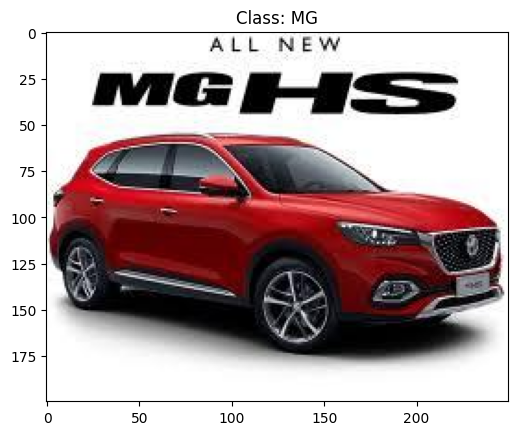

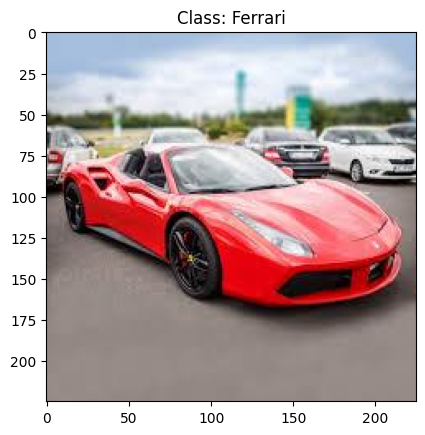

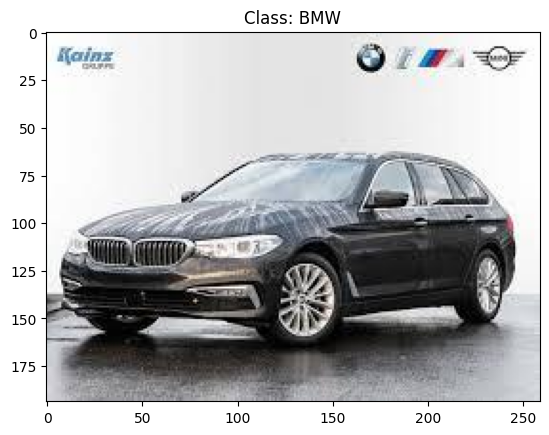

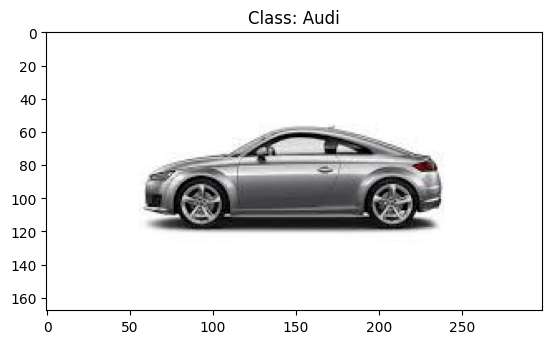

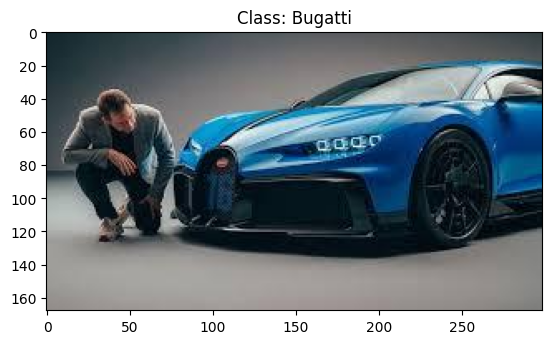

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

#just specify the folder which contain root directory
root_folder = '/kaggle/input/car-brand-dataset/Car_data'

# list of each sub directory folder in the dataset
class_folders = [folder for folder in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, folder))]

# Loop through each class folder and print one image
for class_folder in class_folders:
    class_path = os.path.join(root_folder, class_folder)
    image_files = [file for file in os.listdir(class_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if len(image_files) > 0:
        # Take the first image in the folder
        image_path = os.path.join(class_path, image_files[0])

        # Display the image
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f'Class: {class_folder}')
        plt.show()
    else:
        print(f"No images found in {class_folder} folder.")


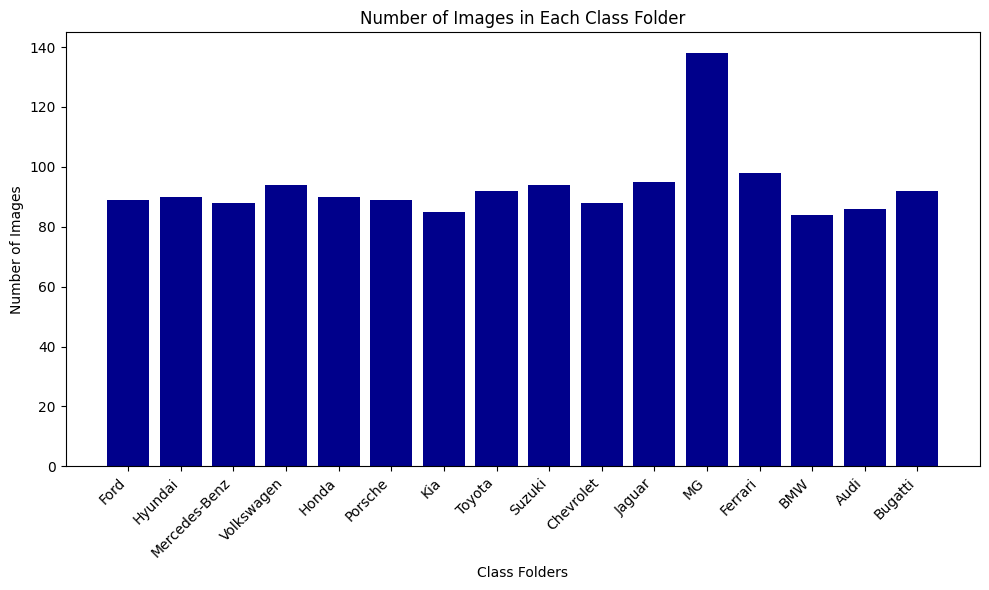

In [12]:
import os
import matplotlib.pyplot as plt

root_folder = '/kaggle/input/car-brand-dataset/Car_data'

class_folders = [folder for folder in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, folder))]

# Count the number of images in each class folder
class_counts = {class_folder: len(os.listdir(os.path.join(root_folder, class_folder))) for class_folder in class_folders}

# Plot the bar graph
plt.figure(figsize=(10,6))
plt.bar(class_counts.keys(), class_counts.values(), color='darkblue')  # Change color to dark blue
plt.xlabel('Class Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class Folder')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


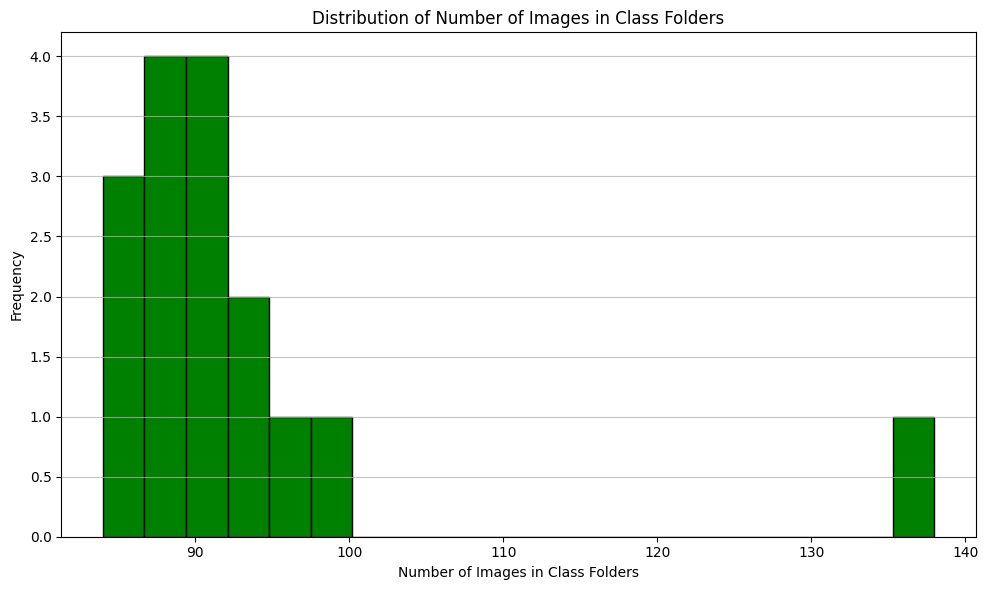

In [13]:
import os
import matplotlib.pyplot as plt

root_folder = '/kaggle/input/car-brand-dataset/Car_data'

class_folders = [folder for folder in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, folder))]

# Count the number of images in each class folder
class_counts = [len(os.listdir(os.path.join(root_folder, class_folder))) for class_folder in class_folders]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(class_counts, bins=20, color='green', edgecolor='black')
plt.xlabel('Number of Images in Class Folders')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Images in Class Folders')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Show the plot
plt.show()


# Splitting into Training and Testing


In [14]:
#re-size all the images to a particular format

IMAGE_SIZE = [224,224]
#here 224,224 is the width and the height.

In [15]:
import os

# Specify the path
dataset_path = '/kaggle/input/car-brand-dataset/Car_data'

# List all directories (folders) in the specified path
folders = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]

# Print the total number of folders
print("Total number of folders:", len(folders))

Total number of folders: 16


In [16]:
import os
import random
import shutil

# Specify the paths
dataset_path = '/kaggle/input/car-brand-dataset/Car_data'
output_folder = '/kaggle/working/'

# List all directories (folders) in the specified path
folders = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]

# Create training and testing folders
train_folder = os.path.join(output_folder, 'train')
test_folder = os.path.join(output_folder, 'test')

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Split ratio (adjust as needed)
split_ratio = 0.8  # 80% for training, 20% for testing

# Iterate over each folder
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    files = os.listdir(folder_path)
    random.shuffle(files)  # Shuffle files to randomize

    # Calculate split index
    split_index = int(len(files) * split_ratio)

    # Assign files to training and testing sets
    train_files = files[:split_index]
    test_files = files[split_index:]

    # Move files to respective folders
    for file in train_files:
        src = os.path.join(folder_path, file)
        dst = os.path.join(train_folder, folder, file)
        os.makedirs(os.path.dirname(dst), exist_ok=True)  # Create subdirectories if needed
        shutil.copy(src, dst)

    for file in test_files:
        src = os.path.join(folder_path, file)
        dst = os.path.join(test_folder, folder, file)
        os.makedirs(os.path.dirname(dst), exist_ok=True)  # Create subdirectories if needed
        shutil.copy(src, dst)

print("Dataset divided into training and testing sets successfully.")


Dataset divided into training and testing sets successfully.


In [17]:
import os

# Specify the path
test_path = '/kaggle/working/test'

# List all directories (folders) in the specified path
folders = [name for name in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, name))]

# Print the total number of folders
print("Total number of folders:", len(folders))

Total number of folders: 16


In [18]:
import os

# Specify the path
train_path = '/kaggle/working/train'

# List all directories (folders) in the specified path
folders = [name for name in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, name))]

# Print the total number of folders
print("Total number of folders:", len(folders))

Total number of folders: 16


# Resnet

In [19]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [20]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [22]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [23]:
  # useful for getting number of output classes
import os
from glob import glob

# Specify the directory containing the folders
directory = '/kaggle/working/train'

# Use glob to get all subdirectories inside the specified directory
folders = glob(os.path.join(directory, '*'))

# Check the number of folders found
print("Number of folders:", len(folders))

# Now folders contains a list of paths to all the subdirectories inside the specified directory


Number of folders: 16


In [24]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [25]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [26]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,193,360 (96.11 MB)

 Trainable params: 1,605,648 (6.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [27]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [28]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/working/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1189 images belonging to 16 classes.


In [30]:
test_set = test_datagen.flow_from_directory('/kaggle/working/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 303 images belonging to 16 classes.


In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/kaggle/working/train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/kaggle/working/test',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom classification layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(training_set.num_classes, activation='softmax')(x)

# Define the model to train
model = Model(inputs=base_model.input, outputs=predictions)

# Set the layers of ResNet50 to be trainable (fine-tuning)
for layer in base_model.layers:
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning
optimizer = tf.keras.optimizers.Adam(lr=0.0001)  # Lower learning rate for fine-tuning
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(training_set,
                    validation_data=test_set,
                    epochs=20,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(test_set))


ModuleNotFoundError: No module named 'tensorflow.keras.optimizers'

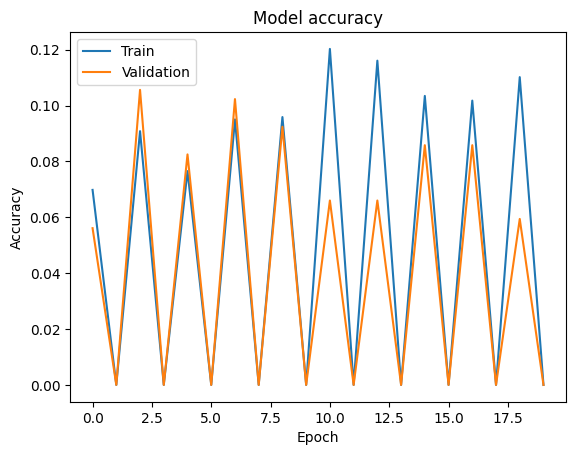

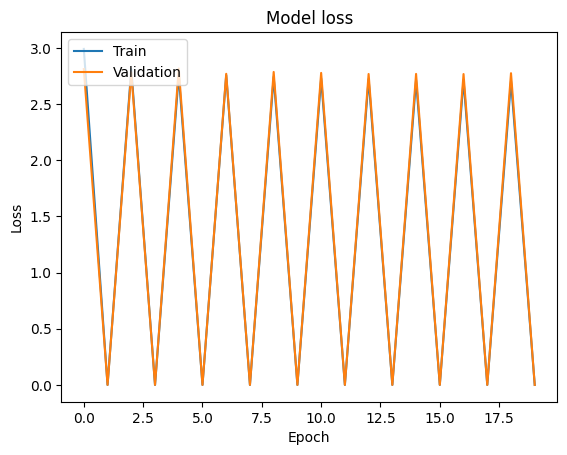

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
